# Pandas - работа с таблицами

## Открытие файлов

Наиболее популярный способ хранения таблиц - CSV - Comma Separated Values - значения, разделённые запятыми.

Рассмотрим файл `births1880.csv`:

In [1]:
filename = "births1880.csv"
input_file = open(filename)
for line in input_file:
    print(line, end='')
input_file.close()

Bob,968
Jessica,155
Mary,77
John,578
Mel,973


Он содержит имена и количества детей, родившихся с таким именем в 1880 году.

Применим библиотеку `pandas`, чтобы открыть его сразу в удобном формате:

In [3]:
import pandas as pd
df = pd.read_csv(filename)
df

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


Функция приняла первую строку за заголовочную. Чтобы этого не произошло, определим аргумент `header`:

In [4]:
df = pd.read_csv(filename, header=None)
df

,0,1
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Можно сразу дать колонкам "говорящие" имена:

In [5]:
df = pd.read_csv(filename, names=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


Рассмотрим подробнее функцию read_csv ([документация на сайте проекта](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)):

In [ ]:
pandas.read_csv(filepath_or_buffer,
                sep=NoDefault.no_default,
                delimiter=None,
                header='infer',
                names=NoDefault.no_default,
                index_col=None,
                usecols=None,
                squeeze=None,
                prefix=NoDefault.no_default,
                mangle_dupe_cols=True,
                dtype=None,
                engine=None,
                converters=None,
                true_values=None,
                false_values=None,
                skipinitialspace=False,
                skiprows=None,
                skipfooter=0, nrows=None,
                na_values=None,
                keep_default_na=True,
                na_filter=True,
                verbose=False,
                skip_blank_lines=True,
                parse_dates=None,
                infer_datetime_format=False,
                keep_date_col=False,
                date_parser=None,
                dayfirst=False,
                cache_dates=True,
                iterator=False,
                chunksize=None,
                compression='infer',
                thousands=None,
                decimal='.',
                lineterminator=None,
                quotechar='"',
                quoting=0,
                doublequote=True,
                escapechar=None,
                comment=None,
                encoding=None,
                encoding_errors='strict',
                dialect=None,
                error_bad_lines=None,
                warn_bad_lines=None,
                on_bad_lines=None,
                delim_whitespace=False,
                low_memory=True,
                memory_map=False,
                float_precision=None,
                storage_options=None)

### Параметры

**filepath_or_buffer** - объект типа `str`, объект-путь (это мы обсудим позже) или объект-файл (то есть то, что возвращает функция `open`). Строка с именем и путём к файлу может быть любой, также можно использовать  URL. Эта URL должна включать http, ftp, s3, gs и файл. Строка на локальный файл имеет вид: `r'file://localhost/path/to/table.csv'`.

**sep** - объект типа `str`, по умолчанию является `','`.
Символ, который будет считаться разделителем между столбцами. 

**delimiter** - объект типа `str`, по умолчанию `None`
То же самое, что `sep`.

**header**  - объект типа `int`, `list` объектов типа `int`, или вообще `None`, по умолчанию `'infer'` (англ. "делать заключение").
Номер ряда, который будет использован как имена столбцов, предыдущие ряды будут проигнорированы. По умолчанию функция "сделает вывод об именах": прочитает первую строку как имена столбцов, если не дать явным образом имена, а если дать, то именами будут считаться те, которые явно переданы в функцию.
Если передать `header=0`, то переданные имена будут проигнорированы.
Если передать сразу список целых чисел, то сразу несколько рядов пойдут в заголовки.

**names**  - объект, подобны массиву (список и др.)
Список имён столбцов. **Не должен содержать повторяющихся значений!**

**index_col** - `int`, `str`, последовательность `int` или `str`, или `False`, по умолчанию `None`.
Колонка или колонки, которые будут использованы как имена рядов датафрейма, задаются строками по именам или по номерам. 

**usecols** - `list`-подобный объект
Подмножество колонок. Все элементы списка должны быть или числами (индексы колонок), или строками (имена колонок). 

**squeeze** - `bool`, по умолчанию `False`
Если в файле одна колонка, вместо датафрейма результат будет серией `serie`. 

⌛ Устарело, начиная с версии 1.4.0: добавьте `.squeeze("columns")` к вызову `read_csv`, чтобы сделать это.

**prefix**  - `str`
Префикс, который добавляется к номерам безымянных колонок, например, 'X' для X0, X1, …

⌛ Устарело, начиная с версии 1.4.0: используйте list comprehension в отношении колонок датафрейма после вызова read_csv.

**mangle_dupe_cols**  - `bool`, по умолчанию `True`
Колонки-дубликаты обретут имена вида 'X', 'X.1', …'X.N' вместо 'X'…'X'. Если передать `False`, останется только последняя колонка с таким именем.

**dtype** Type name or dict of column -> type

Тип данных для колонок. Например,  `{'a': np.float64, 'b': np.int32, 'c': 'Int64'}`. 

**engine** {'c', 'python', 'pyarrow'}, optional
Движок парсера, который нужно использовать. C и pyarrow быстрее, у python больше фич. Многопоточность сейчас поддерживается только pyarrow.

Новое в версии 1.4.0: добавлен экспериментальный движок “pyarrow”, не все фичи для него поддерживаются.

**converters** - `dict`
Словарь функций для конвертирования значений в некоторых колонках. Ключи целые или имена колонок.

**true_values** - `list`
Значения, приравненные к `True`.

**false_values**  -`list`, optional
Значения, приравненные к `False`.

**skipinitialspace** `bool`, по умолчанию False
Убрать пробел после символа-разделителя

**skiprows**  - `list`-подобный, `int` or функция
Номера строк, которые нужно пропустить (нумерация с 0) или число строк (int), пропускаемых в начале файла.

Если применяется функция, то она должна обрабатывать индексы рядов, возвращая `True`, если ряд нужно пропустить, и `False` в противном случае. Пример: `lambda x: x in [0, 2]`.

**skipfooter** - `int`, по умолчанию 0
Число строк, пропускаемых в конце файла (не поддерживается для engine='c').

**nrows** - `int`, optional
Скольк рядов читать. Полезно для чтения кусков больших файлов.

**na_values** - scalar, `str`, `list`-подобный или `dict`
Строки, которые считать `NA`/`NaN` (значение недоступно). Если передавать `dict`, можно задать специфические для колонок значения `NA`. По умолчанию будут читаться как `NaN`: `''`, `'#N/A'`, `'#N/A N/A'`, `'#NA'`, `'-1.#IND'`, `'-1.#QNAN'`, `'-NaN'`, `'-nan'`, `'1.#IND'`, `'1.#QNAN'`, `'<NA>'`, `'N/A'`, `'NA'`, `'NULL'`, `'NaN'`, `'n/a'`, `'nan'`, `'null'`.

**keep_default_na** `bool`, по умолчанию `True`
Включать ли значения `NaN` по умолчанию при чтении данных. В зависимости от того, что подано на `na_values`, поведение следющее:

Если `keep_default_na` - `True`, а `na_values` прописаны, `na_values` добавляются к значения `NaN`  по умолчанию и будут применяться при чтении.

Если `keep_default_na` - `True`, а `na_values` не прописаны, используются только знечения `NaN`по умолчанию.

Если `keep_default_na` - `False`, а `na_values` прописаны, используются только знечения `NaN`, которые заданы вручную.

Если `keep_default_na` - `False`, а `na_values` не прописаны, ничто не распознаётся как `NaN`.

Если при этом в `na_filter` передать `False`, то `keep_default_na` и `na_values` игнорируются.

`na_filter` - `bool`, по умолчанию `True`
Детектировать маркеры недостающих значений (пустые строки и другие значения `na_values`). Если точно известо, что нет никаких `NA` в данных, передача `na_filter=False` может улучшить производительность для больших файлов.

`verbose` - `bool`, по умолчанию `False`
Покажет количество `NA`-значений в нечисловых колонках.

`skip_blank_lines` - `bool`, по умолчанию `True`
Если `True`, пустые строки просто выбрасываются, а не наполняются `NaN`-значениями.

`parse_dates` - `bool` или `list` значений `int` или имён, или `list` из `list`-ов, или `dict`, по умолчанию `False`

Поведение следующее:

boolean. Если `True` - пытается парсить все колонки.

`list` из `int` или имён. Например, если `[1, 2, 3]` - пытается парсить колонки 1, 2, 3 как отдельную дату каждую колонку отдельно.

`list` из `list`-ов. Например, если `[[1, 3]]` - пытается объединить колонку 1 и 3 и парсить как дату их объединение.

`dict`, например, `{'foo' : [1, 3]}` -> парсит колонки 1 и 3 и делает новую колонку с именем `foo`.

`infer_datetime_format` - `bool`, по умолчанию `False`
Если `True` и `parse_dates` включены, `pandas`  попытается сделать вывод о формате времени и даты, и если получится, переключится на быстрый метод парсинга. В некоторых случаях может улучшить время в 5-10 раз.

`keep_date_col` - `bool`, по умолчанию `False`
Если `True` и `parse_dates` требуют объединить какие-то колонки, этот параметр даёт возможность оставить оригинальные колонки.

`date_parser` - функция
Как конвертировать колонку строк в массив дат-времён. По умолчанию использует dateutil.parser.parser. Pandas попытается вызвать `date_parser` тремя разными способами, переходя к следующему, если возникло исключение: 1) передать один или больше массивов (как задано в `parse_dates`) как аргументы; 2) объединить внутри ряда строковые значения из колонок, заданных в `parse_dates` в единый массив  и передеть его; 3) вызвать `date_parser` для каждого ряда, подавая ему одну или несколько строк (в зависимости от того, что передано в `parse_dates`) как аргументы.

`dayfirst` - `bool`, по умолчанию `False`
Формат дат `DD/MM`, международный и европейский, в отличие от `MM/DD` американского.

`cache_dates` - `bool`, по умолчанию `True`
Если `True`, запоминает даты, которые уже сконвертировал. Может дать существенное ускорение в случае повторных значений.

`thousands` - `str`
Разделитель тысяч. Например, в США тысячи принято разделять запятой, в России - пробелом.

`decimal` - `str`, по умолчанию `'.'`
Симваол, который будет читаться как десятичная запятая (используйте `','` для европейских данных).

`lineterminator` - `str` (длины 1)
Разделитель строк. Только для парсера C.

`quotechar` - `str` (длины 1)
Символ, применяемый в качестве кавычки. "Закавыченный" кусок файла может содержать символы-разделители, которые проигнорируются.

`quoting` - `int` or `csv.QUOTE_*` instance, default 0
Control field quoting behavior per csv.QUOTE_* constants. Use one of QUOTE_MINIMAL (0), QUOTE_ALL (1), QUOTE_NONNUMERIC (2) or QUOTE_NONE (3).

`doublequote` - `bool`, по умолчанию `True`
Если `quotechar` задан и `quoting` не `QUOTE_NONE`, показывает, считать ли два последовательных `quotechar`-элемента внутри поля как один `quotechar`-элемент.

`escapechar` - `str` (длины 1)
[Символ для игнорирования других символов](https://stackoverflow.com/questions/13824840/escaped-quotes-in-pandas-read-csv).

`comment` - `str`
Индикатор строк, который читать не нужно. Один символ. Как и для пустых строк (as long as skip_blank_lines=True), полностью закомментированные строки игнорируются в параметре `header` но не в `skiprows`. Например, если `comment='#'`, чтение `#empty\na,b,c\n1,2,3` с `header=0` даст результат `'a,b,c'` в качестве ряда-заголовка.

`encoding` - `str`
Кодировка (ex. 'utf-8'). [Список стандартных кодировок](https://docs.python.org/3/library/codecs.html#standard-encodings).

`encoding_errors` - `str`, по умолчанию `“strict”`
Как обрабатывать ошибки. `“strict”` - выдаёт ошибку, `“ignore”` - игнорирует плохие данные и продолжает молча. [Список вариантов](https://docs.python.org/3/library/codecs.html#error-handlers).

`dialect` - `str` или `csv.Dialect`
Быстро задаёт `delimiter`, `doublequote`, `escapechar`, `skipinitialspace`, `quotechar` и `quoting`. Если они уже заданы, всё равно будут значения, заданные через `dialect`

`error_bad_lines` `bool`, по умолчанию `None`
Строки с лишними полями (например, строка в csv с лишними запятыми) по умолчанию выдаст ошибку, а датафрейм не даст. Если `False`, то "плохие строки" будут просто выброшены из датафрейма.

⌛Устарело с версии 1.3.0: The on_bad_lines parameter should be used instead to specify behavior upon encountering a bad line instead.

`warn_bad_lines` - `bool`, по умолчанию `None`
Если `error_bad_lines` - `False`, а `warn_bad_lines` - `True`, выведется предупреждение для каждой "плохой" строки.

⌛Устарело с версии  1.3.0: The on_bad_lines parameter should be used instead to specify behavior upon encountering a bad line instead.

`on_bad_lines` - `{'error', 'warn', 'skip'}` или функция, по умолчанию 'error'
Что делать с "плохими" строками. Значения следующие:

'error', вызвать ошибку.

'warn', вызвать предупреждение.

'skip', просто проигноировать.

Начиная с версии 1.3.0:

Функция принимает `bad_line: list[str]`, возвращает `list[str]`
Должна работать с одной плохой строкой, которая является списоком строк, полученных делением по `sep`. Если функция возвращает `None`, плохая строка игнорируется. Если вернёт список, в котором всё равном слишком много элементов, возникнет ParserWarning, лишние элементы будут выброшены.Работает с `engine="python"`

`delim_whitespace` - `bool`, по умолчанию `False`
Считать ли пробелы (e.g. `' '` или `'    '`) разделителями. Эквивалентно `sep='\s+'`. Если `True`, в `delimeter` ничего передавать не нужно.

`low_memory` - `bool`, по умолчанию `True`
Порежет файл на кусочки для меньшей памяти, требуемой при чтении, однако возможно смешение типов. Во избежание, установите `False` или задайте тип через `dtype`.

`float_precision` - `str`
Как движок C будет конвертировать дробные числа. Варианты - `None` или `'high'` для обычного конвертера, `'legacy'` для оригинального с низкой точностью lower precision pandas converter.

In [25]:
import pandas as pd
df = pd.read_csv('sample.csv', sep='\t')
df

,"input,response"
0,"1,2"
1,"3,4"
2,"5,5"
3,"7,8"


In [12]:
df.plot('input','response', ylabel='responce')

KeyError: 'input'

## Упражнения

Построить графики для Chromo.txt, mutant.txt и wild_type.txt из лабораторной №2. Для Chromo.txt построить только отрезок от 4 до 7 минут.

<AxesSubplot:title={'center':'Mutant'}, xlabel='Concentration, nM'>

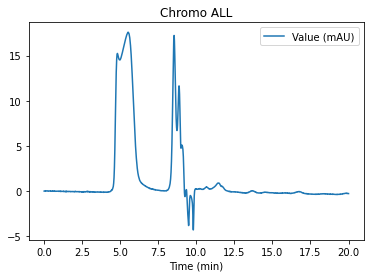

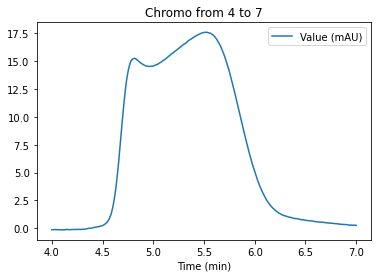

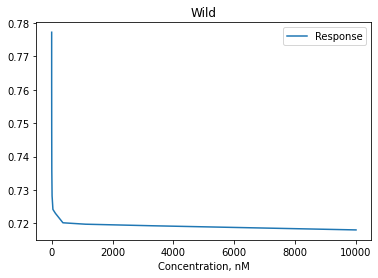

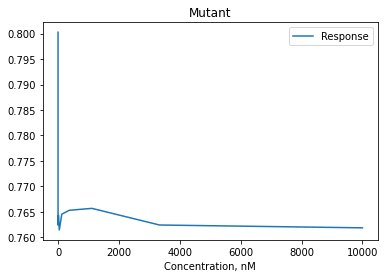

In [58]:
import pandas as pd
Chromo_file = pd.read_csv('Chromo.txt', sep='	')
Wild = pd.read_csv('wild_type.txt', sep='	')
Mutant = pd.read_csv('mutant.txt', sep='	')

Chromo_file_new = Chromo_file[(Chromo_file['Time (min)'] >= 4) & (Chromo_file['Time (min)'] <= 7)]

Chromo_file.plot('Time (min)', 'Value (mAU)', title = 'Chromo ALL')
Chromo_file_new.plot('Time (min)', 'Value (mAU)', title = 'Chromo from 4 to 7')
Wild.plot('Concentration, nM', 'Response', title = 'Wild')
Mutant.plot('Concentration, nM', 'Response', title = 'Mutant')